# Objective: 

* Explore the dataset and extract actionable insights that will enable growth in the market.
* Explore and visualize the dataset.
* Build a linear regression model to predict the prices of used cars.
* Generate a set of insights and recommendations that will help the business.
* Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.



# Data:
**used_cars_data.csv** - it contains information about car models.
* S.No.: Serial Number
* Name: Name of the car which includes Brand name and Model name
* Location: The location in which the car is being sold or is available for purchase Cities
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car. (Automatic / Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC.
* Power: The maximum power of the engine in bhp.
* Seats: The number of seats in the car.
* New_Price: The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price: The price of the used car in INR Lakhs (1 Lakh = 100, 000)

### Import the necessary packages

In [1279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Read the dataset

In [1280]:
df = pd.read_csv("used_cars_data.csv")

In [1281]:
# copying data to another varaible to avoid any changes to original data
cars = df.copy()

### View the first and last 5 rows of the dataset.

In [1282]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740


In [1283]:
cars.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.000,NaN,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.000,NaN,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.000,NaN,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.000,NaN,nan
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.000,NaN,nan


### Understand the shape of the dataset.

In [1284]:
cars.shape

(7253, 14)

* Dataset has 7253 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [1285]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


## Fixing the data types

* We noticed New Price was an object and had two currency types. Here we will convert to a float and convert Cr to Lakh as our standard currency.

In [1286]:
def income_to_num(income_val):
    """This function takes in a string representing a salary in Cr or Lakh
    and converts it to a number."""
    if isinstance(income_val, str):  # checks if `income_val` is a string
        multiplier = 1 
        if income_val.endswith('Cr'):
            multiplier = 100
        return float(income_val.replace('Cr', '').replace('Lakh', '')) * multiplier                  
    else:  # this happens when the current income is np.nan
        return np.nan
    
cars["New_Price"] = cars["New_Price"].apply(income_to_num)
    
cars["New_Price"].head() 

0     nan
1     nan
2   8.610
3     nan
4     nan
Name: New_Price, dtype: float64

* Name, Location, Fuel Type, Transmission, Owner Type, and Seats are of object type, we can change them to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [1287]:
cars["Name"] = cars["Name"].astype("category")
cars["Location"] = cars["Location"].astype("category")
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
cars["Seats"] = cars["Seats"].astype("category")

In [1288]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   category
 12  New_Price          1006 non-null   float64 
 13  Price              6019 non-null   float64 
dtypes: category(6), float64(2), int64(3), object(3)
memory usage: 600.2+ KB


* Name, Location, Fuel Type, Transmission, Owner Type, and Seats have been converted to categories

`we can see that the memory usage has decreased from 793.4KB to 600.2KB`

* Mileage, Engine, and Power need to be converted to float. Before we are able to convert, we must drop the string associated.

In [1289]:
cars['Mileage'].replace('kmpl','',regex=True,inplace=True)
cars['Mileage'].replace('km/kg','',regex=True,inplace=True)
cars['Engine'].replace('CC','',regex=True,inplace=True)
cars['Power'].replace('bhp','',regex=True,inplace=True)

In [1290]:
cars["Mileage"] = cars["Mileage"].astype("float")
cars["Engine"] = cars["Engine"].astype("float")

* We are unable to convert Power just yet as there are still nulls in the column. We will convert when we fill null values.

In [1291]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7207 non-null   object  
 11  Seats              7200 non-null   category
 12  New_Price          1006 non-null   float64 
 13  Price              6019 non-null   float64 
dtypes: category(6), float64(4), int64(3), object(1)
memory usage: 600.2+ KB


* We are unable to convert Power just yet as there are still nulls in the column. We will convert when we fill null values.

### Give a statistical summary for the dataset.

In [1292]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.000,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
New_Price,1006.000,22.780,27.759,3.910,7.885,11.570,26.043,375.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


* Kilometers Driven, Mileage, and Engine have approximately the same mean and median.
* Price and New Price appear to be skewed based on the variation between mean and median.

In [1293]:
cars.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.000,NaN,NaN,NaN,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.000,NaN,NaN,NaN,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,NaN,NaN,NaN,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000


* Mahindra XUV500 W8 2WD is the top car model for used cars.
* Mumbai is the top Location for where the cars are available for purchase

### Check for missing values

In [1294]:
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

* There are missing values in the data.
* Mileage, Engine, Power, Seats, New_Price, and Price have missing values

### Filling missing values

* We must start by backfilling all null and na values with zero so we can fill in the missing values with the median. Then we will convert Power column to a float so that it can be included.

In [1295]:
cars["Power"] = cars["Power"].fillna(0)

In [1296]:
cars["Power"].replace('null ', 0, inplace = True)

In [1297]:
cars["Power"] = cars["Power"].astype("float")

In [1298]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7253 non-null   float64 
 11  Seats              7200 non-null   category
 12  New_Price          1006 non-null   float64 
 13  Price              6019 non-null   float64 
dtypes: category(6), float64(5), int64(3)
memory usage: 600.2 KB


* Now that we have backfilled all the null values in the Power column, we are able to convert to a float.

In [1299]:
# we will replace missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
cars[numeric_columns] = cars[numeric_columns].apply(medianFiller, axis=0)

In [1300]:
# check the unique values in each column of the dataframe
cars.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 384
Seats                   9
New_Price             626
Price                1373
dtype: int64

In [1301]:
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to display numbers in digits
cars.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.000,NaN,NaN,NaN,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.000,NaN,NaN,NaN,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,NaN,NaN,NaN,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7253.000,NaN,NaN,NaN,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7253.000,NaN,NaN,NaN,1615.790,593.475,72.000,1198.000,1493.000,1968.000,5998.000


In [1302]:
cars['Seats'] = cars['Seats'].astype(str).replace('nan', '0.0').astype('category') #filling na with 0 value
cars["Seats"].unique()

[5.0, 7.0, 8.0, 4.0, 6.0, 2.0, 0.0, 10.0, 9.0]
Categories (9, object): [5.0, 7.0, 8.0, 4.0, ..., 2.0, 0.0, 10.0, 9.0]

In [1303]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7253 non-null   float64 
 9   Engine             7253 non-null   float64 
 10  Power              7253 non-null   float64 
 11  Seats              7253 non-null   category
 12  New_Price          7253 non-null   float64 
 13  Price              7253 non-null   float64 
dtypes: category(6), float64(5), int64(3)
memory usage: 600.2 KB


### EDA

### Univariate analysis

In [1304]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Year

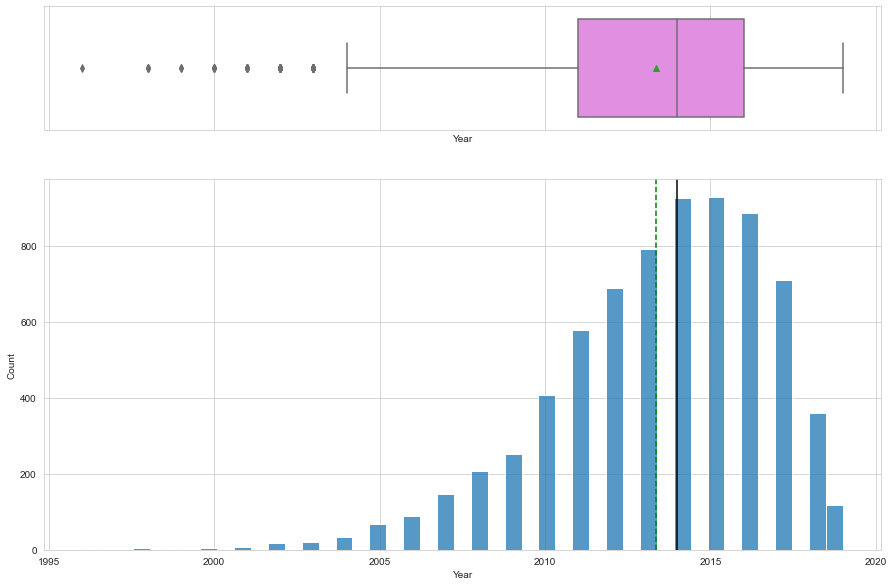

In [1305]:
histogram_boxplot(cars["Year"])

* The distribution of the model year is slightly skewed to the right.
* A majority of the cars year model is around 2014/2015.

## Observations on Kilometers Driven

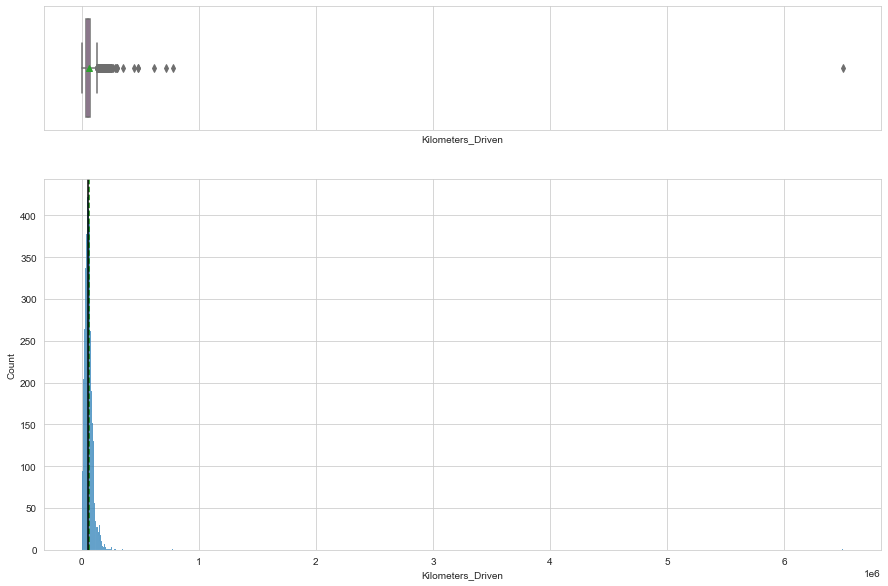

In [1306]:
histogram_boxplot(cars["Kilometers_Driven"])

* The data for Kilometers_Driven is heavily skewed to the left due to an outlier.
* Many of the used cars have low distance driven.

## Observations on Mileage

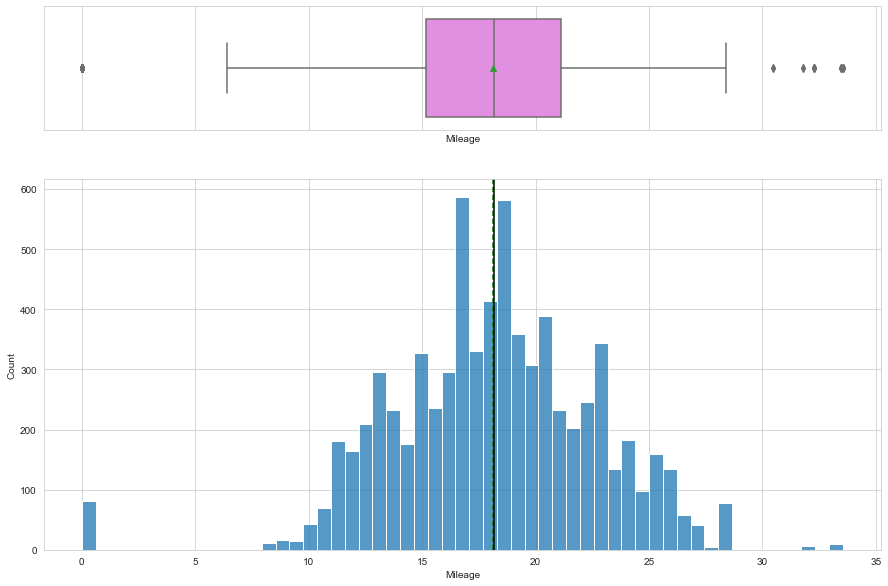

In [1307]:
histogram_boxplot(cars["Mileage"])

* Mileage is mostly normally distributed with outliers on both sides.

## Observations on Engine

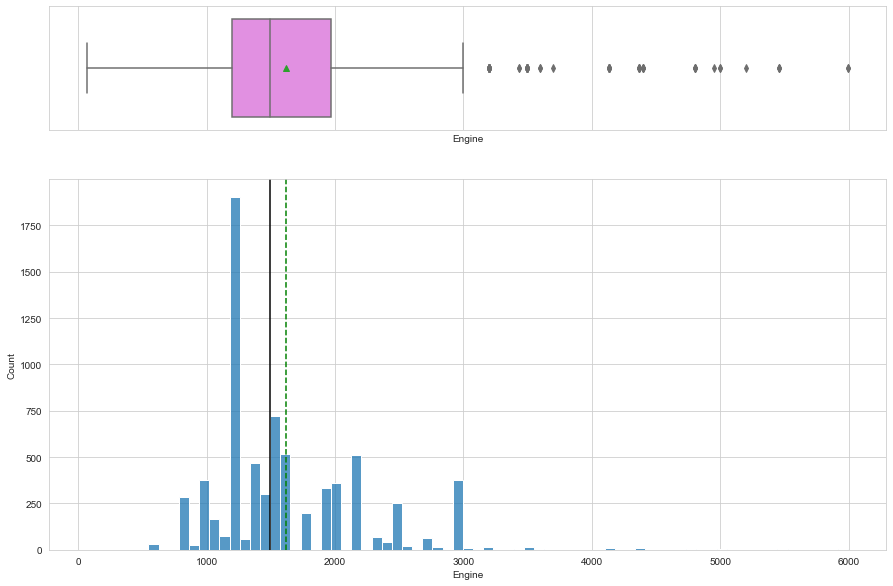

In [1308]:
histogram_boxplot(cars["Engine"])

* The Engine spec is slightly skewed to the right with outliers on the right tail of the data.

## Observations on Power

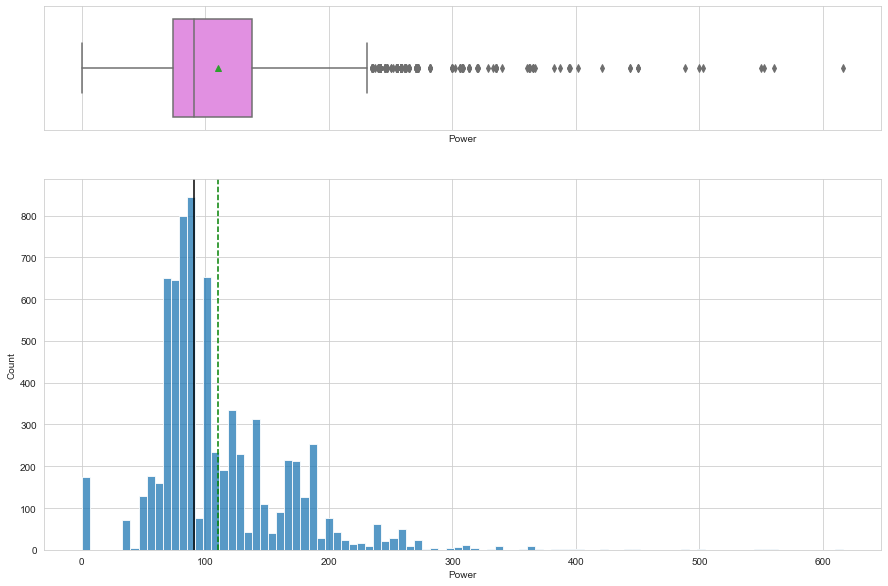

In [1309]:
histogram_boxplot(cars["Power"])

* Car Power appears to be mostly normally distributed skewed slightly to the left. 
* There are also outliers trailing out to the right.

## Observations on Price

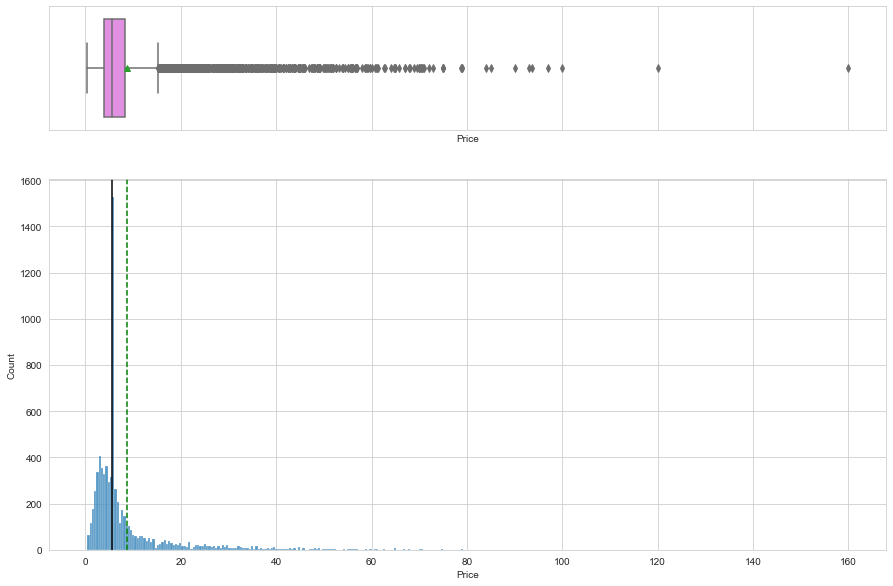

In [1310]:
histogram_boxplot(cars["Price"])

* Car Price appears to be mostly normally distributed skewed heavily to the left. 
* There are also several outliers trailing out to the right.

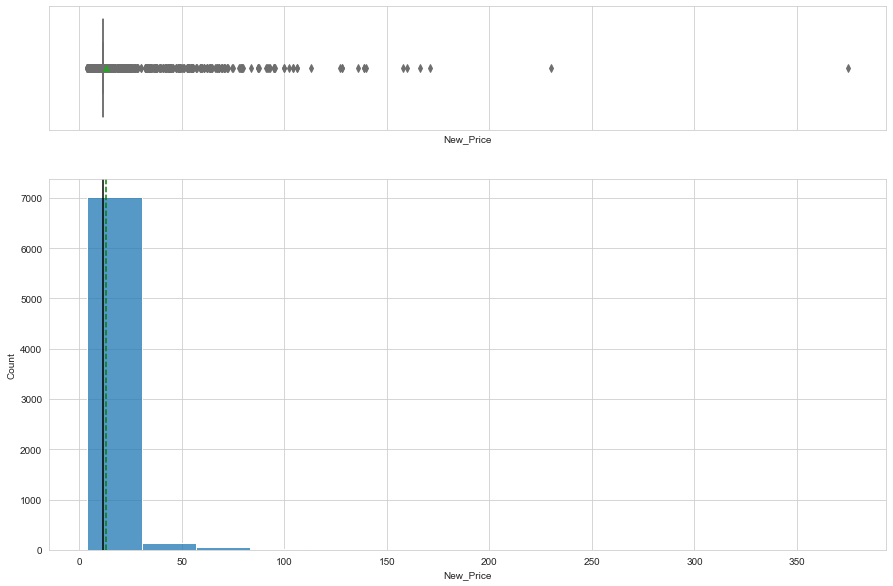

In [1311]:
histogram_boxplot(cars["New_Price"])

* The new price is heavily skewed to the left due to the backfilling with the median data. 
* This is why a majority of the distribution is centered around a single value and why the mean and the median are almost identical.
* We don’t believe that the new price has a very strong influence on the price of the car used.

In [1312]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Location

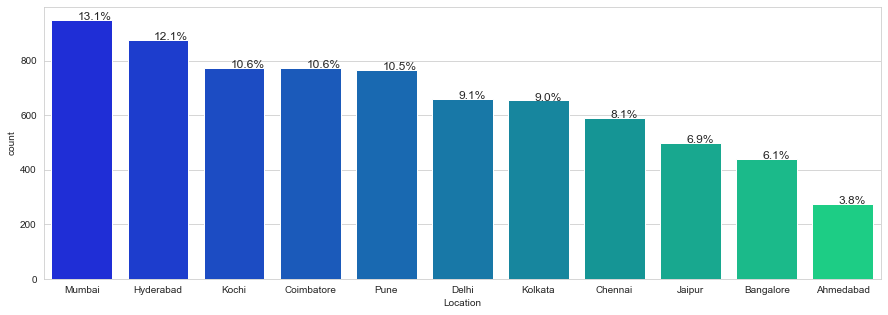

In [1313]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cars['Location'],palette='winter', order = cars['Location'].value_counts().index)
perc_on_bar(ax,cars['Location'])

* A majority of the used cars are being sold in Mumbai with Hyderabad in second.

## Observations on Fuel Type

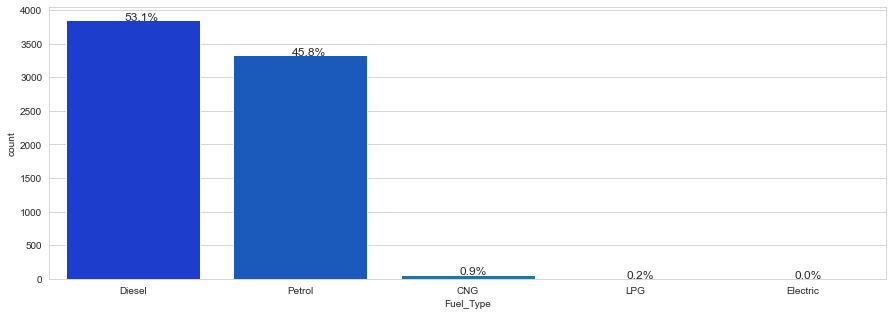

In [1314]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cars['Fuel_Type'],palette='winter', order = cars['Fuel_Type'].value_counts().index)
perc_on_bar(ax,cars['Fuel_Type'])

* A majority of the fuel type is split between diesel and petrol.

## Observations on Transmission

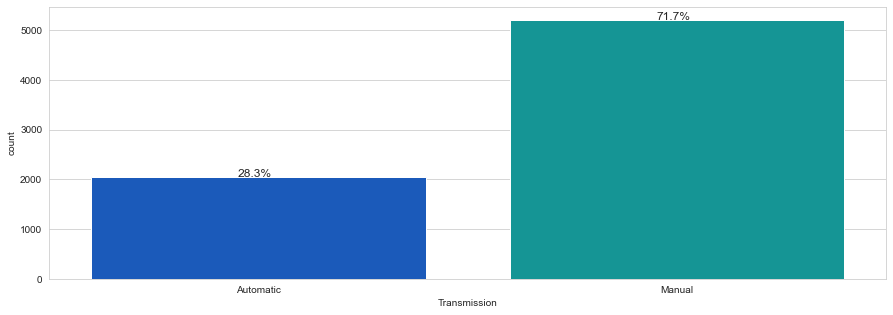

In [1315]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cars["Transmission"],palette='winter')
perc_on_bar(ax,cars["Transmission"])

* Most of the used cars are manual transmission at 71.7%

## Observations on Owner Type

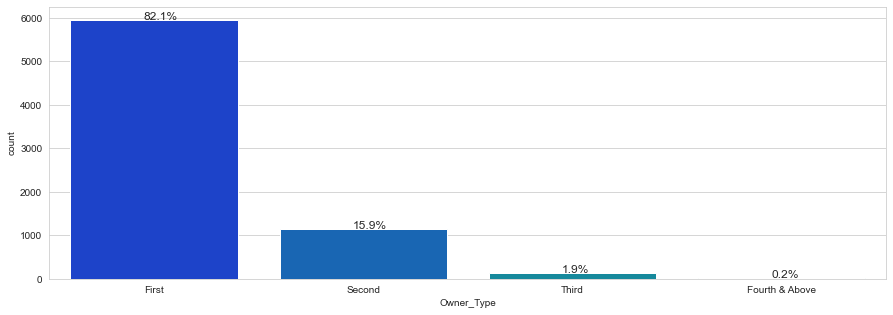

In [1316]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cars['Owner_Type'],palette='winter', order = cars['Owner_Type'].value_counts().index)
perc_on_bar(ax,cars['Owner_Type'])

* Most used cars have been owned only once before being sold at 82.1%.

## Observations on Seats

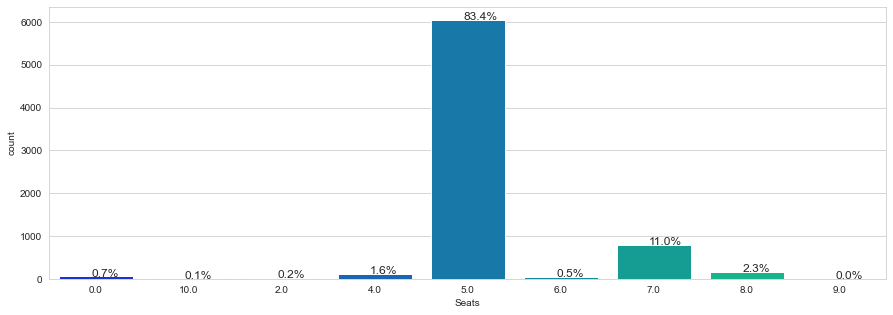

In [1317]:
plt.figure(figsize=(15,5))
ax = sns.countplot(cars["Seats"],palette='winter')
perc_on_bar(ax,cars["Seats"])

* A majority of the used cars are 5 seat vehicles at 84.1%.
*  53 null values for this set was backfilled with the median value.

## Bivariate Analysis

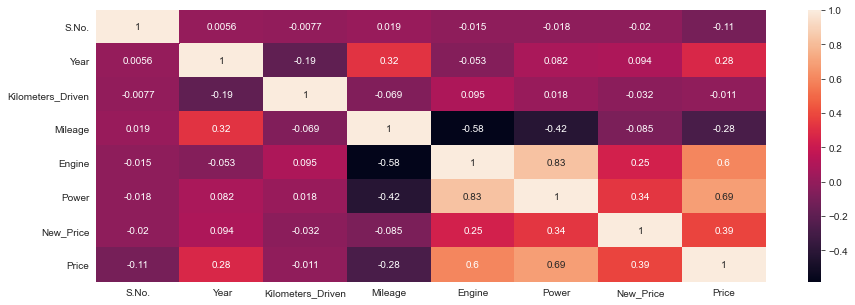

In [1318]:
plt.figure(figsize=(15,5))
sns.heatmap(cars.corr(),annot=True)
plt.show()

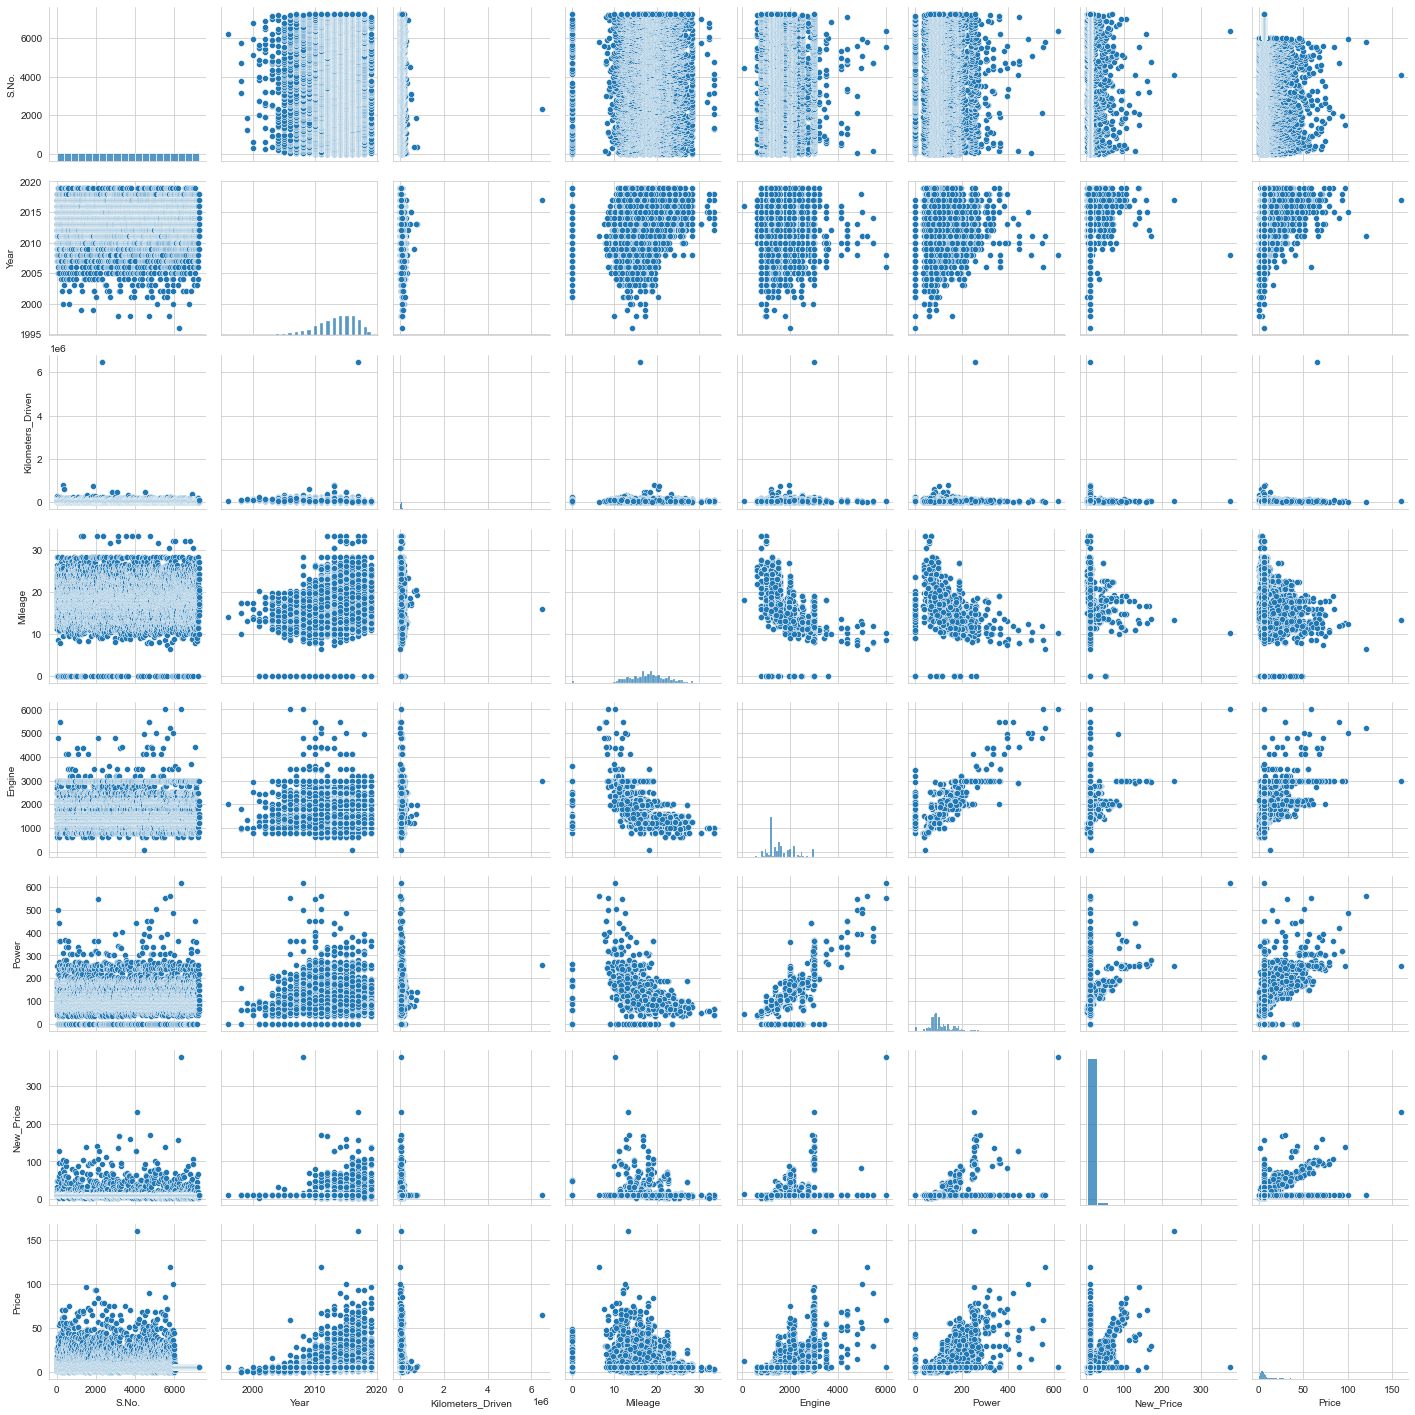

In [1319]:
sns.pairplot(data=cars)
plt.show()

* Price is the dependent variable for this analysis.
* Price has positive correlation with Engine and Power.
* Engine and power have a very strong positive correlation.

### Price vs Power

<AxesSubplot:xlabel='Power', ylabel='Price'>

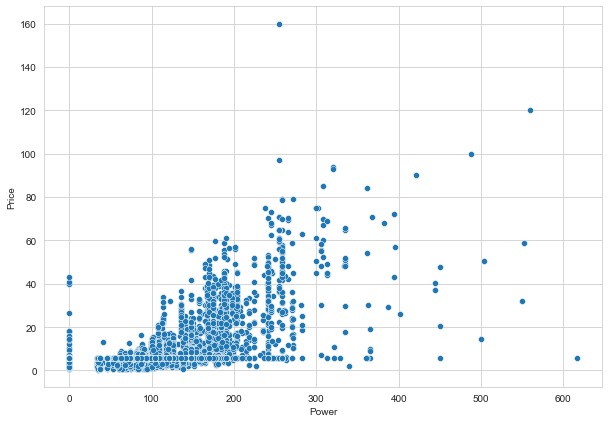

In [1320]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Power", data=cars)

* Price and power have a fairly strong positive correlation.
* Since engine and power have a strong correlation, it can be concluded that the car price is correlated to the car performance.

### Price vs Engine

<AxesSubplot:xlabel='Engine', ylabel='Price'>

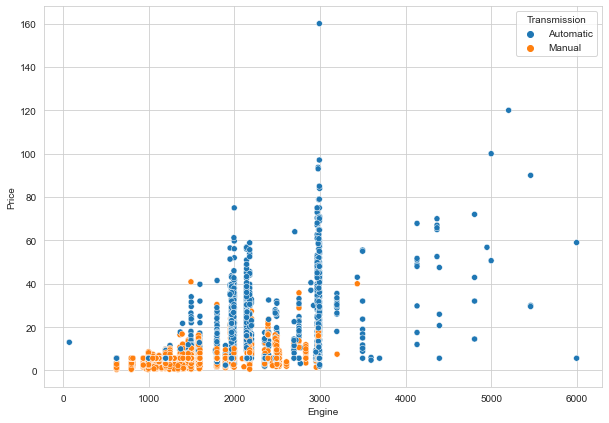

In [1321]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Engine", hue = "Transmission", data=cars)

* As expected, engine and price also has a strong correlation.
* Transmission type does not appear to have a strong influence on the price of the car.

### Price vs New Price

<AxesSubplot:xlabel='New_Price', ylabel='Price'>

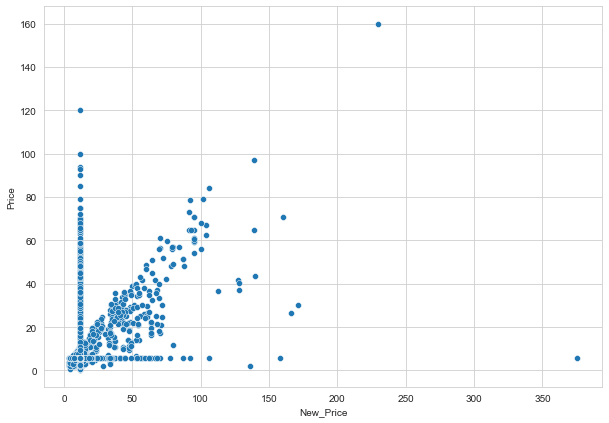

In [1322]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="New_Price", data=cars)

* Price and new price appear to have a strong positive correlation but we must be cautious to conclude as a majority of the new price data has been backfilled and replaced with the median value of the data.

### Price vs Kilometers Driven

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

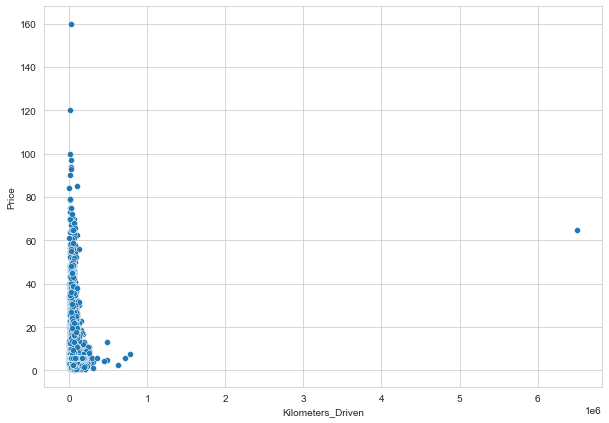

In [1323]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Kilometers_Driven", data=cars)

* There does appear to be some correlation with price and the kilometers driven. Most higher priced cars have low kilometers driven.
* There is one outlier that does not fit the statement above.

### Year vs Price

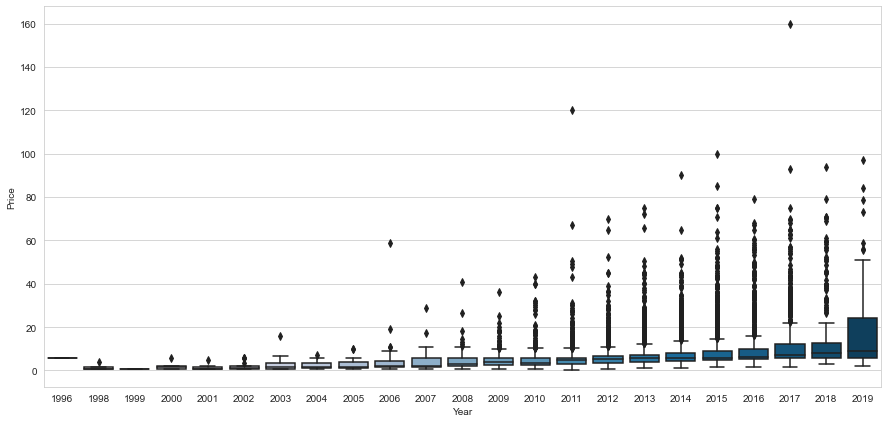

In [1324]:
plt.figure(figsize=(15,7))
sns.boxplot(cars["Year"],cars["Price"],palette="PuBu")
plt.show()

* There is a correlation with price and the car model year. 
* It appears that on average newer cars are sold for a higher price. 
* There is a wider range of price for 2019 cars than for any other year.

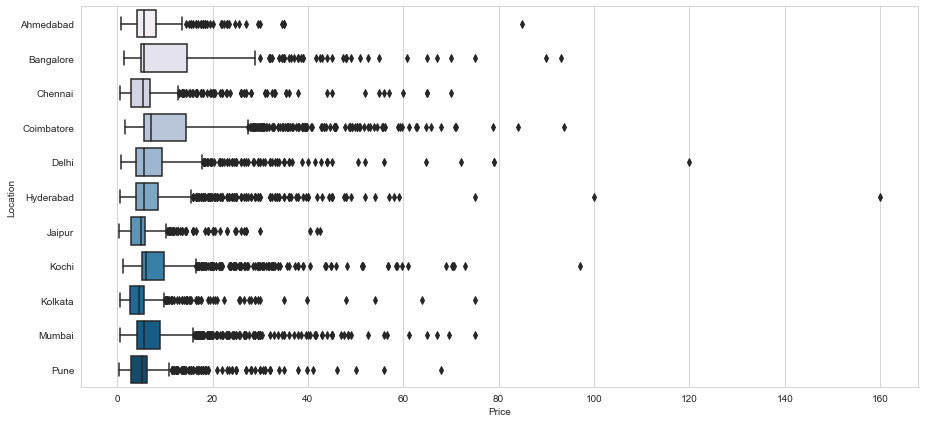

In [1325]:
plt.figure(figsize=(15,7))
sns.boxplot(cars["Price"],cars["Location"],palette="PuBu")
plt.show()

* Based on the averages, there does not appear to be a strong correlation to the price and where the car is sold.

### Feature Engineering

In [1326]:
cars['Make'] = cars['Name'].str.split(' ').str[0]

In [1327]:
cars['Make'] = cars['Make'].astype(str).replace('ISUZU', 'Isuzu').astype('object')
cars["Make"] = cars["Make"].astype("category")

In [1328]:
cars['Make'].nunique()

32

* Created a new column to have only the make of the cars to reduce the number of variables observed.

### Standardizing Power and Kilometers Driven

* Trying out standard scaling to see affect on training model

In [1329]:
cars['Power_z_std'] = StandardScaler().fit_transform(cars[['Power']])
cars['Kilometers_Driven_z_std'] = StandardScaler().fit_transform(cars[['Kilometers_Driven']])

In [1330]:
cars['Power_z_std'] = StandardScaler().fit_transform(cars[['Power']])

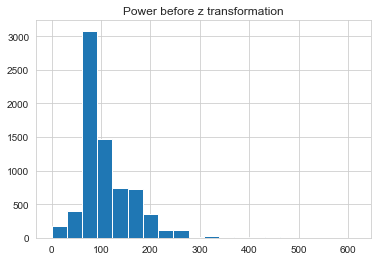

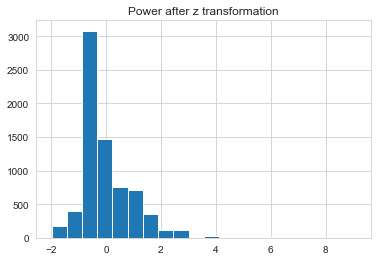

In [1331]:
cars['Power'].hist(bins=20)
plt.title('Power before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']

cars['Power_z_std'].hist(bins=20)
plt.title('Power after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
#df.drop(['Weight'], axis=1, inplace=True)

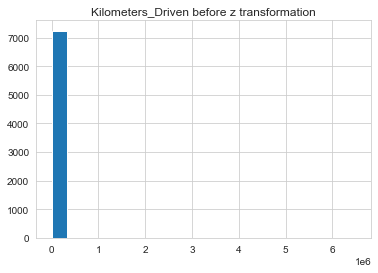

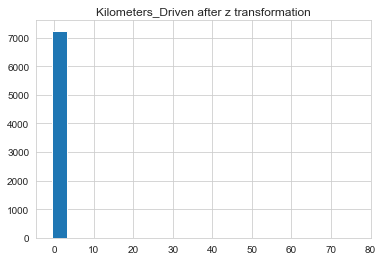

In [1332]:
cars['Kilometers_Driven'].hist(bins=20)
plt.title('Kilometers_Driven before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']

cars['Kilometers_Driven_z_std'].hist(bins=20)
plt.title('Kilometers_Driven after z transformation')
plt.show()
# exact same shape since it's a linear transformation.
#df.drop(['Weight'], axis=1, inplace=True)

### Outliers

* Here we will investigate the outliers as most of our numeric data is skewed with several outliers. 
* We will investigate to confirm this claim.

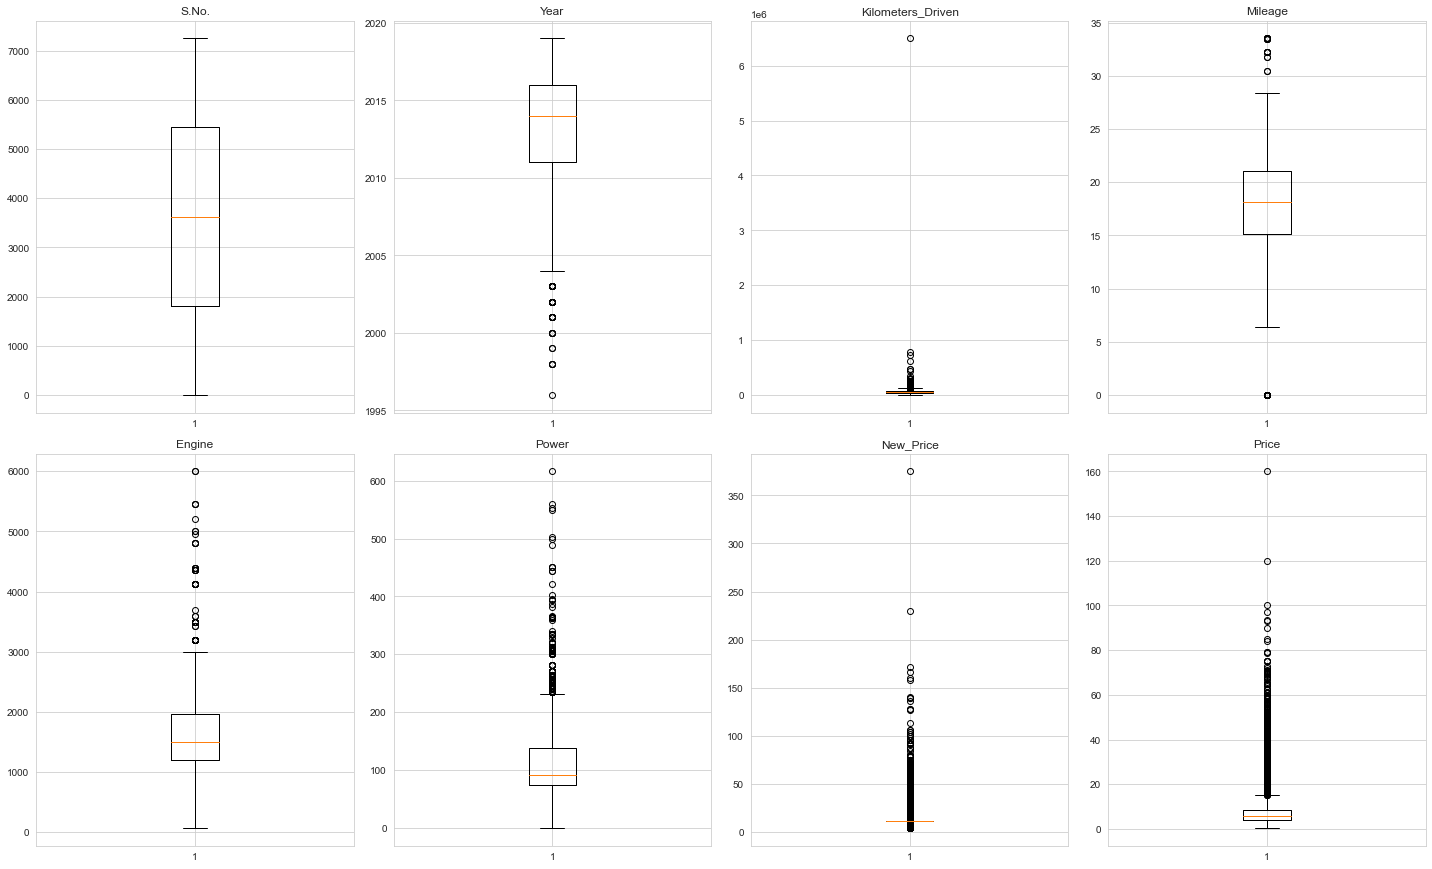

In [1333]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(cars[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All variables (except serial number) have outliers.

* Year has lower outliers.

* All other numerical columns have upper outliers.

### Outlier Treatment

In [1334]:
# Let's treat outliers by flooring and capping
def treat_outliers(cars, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    cars: dataframe
    col: name of the column
    """
    Q1 = cars[col].quantile(0.25)  # 25th quantile
    Q3 = cars[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    cars[col] = np.clip(cars[col], Lower_Whisker, Upper_Whisker)

    return cars


def treat_outliers_all(cars, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    cars: data frame
    """
    for c in col_list:
        cars = treat_outliers(cars, c)

    return cars

In [1335]:
numerical_col = cars.select_dtypes(include=np.number).columns.tolist()
cars = treat_outliers_all(cars, numerical_col)

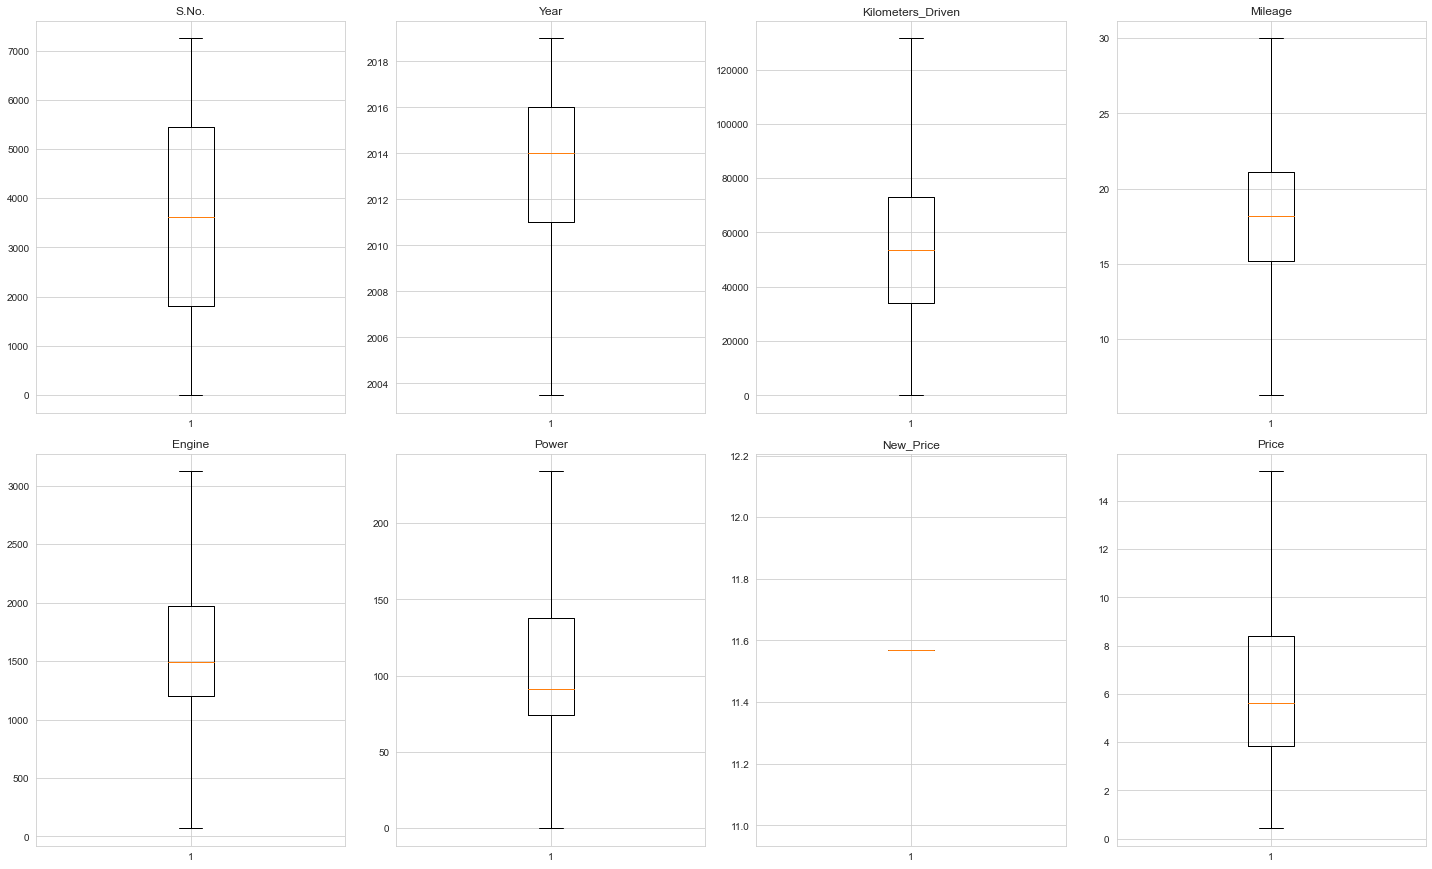

In [1336]:
# Verifying via box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(cars[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All numerical variables have been treated for outliers.
* Seats and New Price have had a majority of their values dropped since they were backfilled with their medians.

### Data Preparation for Modeling

In [1337]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Power_z_std,Kilometers_Driven_z_std
0,0,Maruti Wagon R LXI CNG,Mumbai,2010.000,72000,CNG,Manual,First,26.600,998.000,58.160,5.0,11.570,1.750,Maruti,-0.933,0.158
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015.000,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.0,11.570,12.500,Hyundai,0.291,-0.210
2,2,Honda Jazz V,Chennai,2011.000,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.0,11.570,4.500,Honda,-0.384,-0.150
3,3,Maruti Ertiga VDI,Chennai,2012.000,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.0,11.570,6.000,Maruti,-0.383,0.335
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013.000,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.0,11.570,15.225,Audi,0.553,-0.214


In [1338]:
# defining X and y variables
X = cars.drop(["Price", "S.No.", "Location", "New_Price", "Name", "Power", "Kilometers_Driven", "Engine"], axis=1)
y = cars[["Price"]]

print(X.head())
print(y.head())

      Year Fuel_Type Transmission Owner_Type  Mileage Seats     Make  \
0 2010.000       CNG       Manual      First   26.600   5.0   Maruti   
1 2015.000    Diesel       Manual      First   19.670   5.0  Hyundai   
2 2011.000    Petrol       Manual      First   18.200   5.0    Honda   
3 2012.000    Diesel       Manual      First   20.770   7.0   Maruti   
4 2013.000    Diesel    Automatic     Second   15.200   5.0     Audi   

   Power_z_std  Kilometers_Driven_z_std  
0       -0.933                    0.158  
1        0.291                   -0.210  
2       -0.384                   -0.150  
3       -0.383                    0.335  
4        0.553                   -0.214  
   Price
0  1.750
1 12.500
2  4.500
3  6.000
4 15.225


In [1339]:
print(X.shape)
print(y.shape)

(7253, 9)
(7253, 1)


In [1340]:
# creating dummy variables
X = pd.get_dummies(X, columns=["Make", "Transmission", "Owner_Type", "Fuel_Type","Seats"], drop_first=True)
X.drop(["Seats_10.0", "Fuel_Type_Electric"], axis = 1, inplace = True)
X.head()

,Year,Mileage,Power_z_std,Kilometers_Driven_z_std,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0
0,2010.000,26.600,-0.933,0.158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2015.000,19.670,0.291,-0.210,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2011.000,18.200,-0.384,-0.150,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2012.000,20.770,-0.383,0.335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,2013.000,15.200,0.553,-0.214,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [1341]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [1342]:
X_train.head()

,Year,Mileage,Power_z_std,Kilometers_Driven_z_std,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Hindustan,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_OpelCorsa,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0
3181,2014.000,22.500,-0.773,-0.079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
952,2018.000,13.680,0.679,0.395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2266,2009.000,11.500,1.096,0.862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1504,2017.000,20.770,-0.383,-0.177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
7213,2013.000,22.300,-0.648,0.862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


### Training the model

In [1343]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [1344]:
# Checking the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.430
Mileage,-0.154
Power_z_std,1.230
Kilometers_Driven_z_std,-0.342
Make_Audi,1.776
Make_BMW,1.612
Make_Bentley,6.160
Make_Chevrolet,-2.386
Make_Datsun,-2.785
Make_Fiat,-2.221


Checking the performance of the model using different metrics
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE.
* We will create a function which will print out all the above metrics in one go.

In [1345]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

In [1346]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.595,29.731,2.238,0.714


In [1347]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.586,29.919,2.216,0.732


**Observations**

- The training and testing scores are 71% and 73% respectively, and both the scores are comparable. Hence, the model is a decent fit.

- R-squared is 0.732 on the test set, i.e., the model explains 73.2% of total variation in the test dataset. So, overall the model is mediocre at capturing most of the price variation.

- MAE indicates that our current model is able to predict life expectancy within a mean error of 1.58 Lakh on the test data.

- MAPE on the test set suggests we can predict within 29.91% of the price.

### Linear Regression using statsmodels

In [1348]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     273.2
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:43   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5030   BIC:                         2.299e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1349]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                       814022.479
Year                             2.050
Mileage                          3.041
Power_z_std                      3.971
Kilometers_Driven_z_std          1.772
Make_Audi                      278.202
Make_BMW                       303.641
Make_Bentley                     3.037
Make_Chevrolet                 150.217
Make_Datsun                     18.165
Make_Fiat                       39.145
Make_Force                       4.036
Make_Ford                      338.095
Make_Hindustan                   2.008
Make_Honda                     675.126
Make_Hyundai                  1104.487
Make_Isuzu                       6.051
Make_Jaguar                     49.354
Make_Jeep                       20.186
Make_Lamborghini                 2.072
Make_Land                       68.173
Make_Mahindra                  320.475
Make_Maruti                   1169.606
Make_Mercedes-Benz             365.577
Make_Mini                       32.344
Make_Mitsub

In [1350]:
# we drop the one with the highest vif values and check the adjusted R-squared
X_train2 = X_train1.drop("Make_Maruti", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                       802218.232
Year                             2.050
Mileage                          3.037
Power_z_std                      3.948
Kilometers_Driven_z_std          1.750
Make_Audi                        1.997
Make_BMW                         2.273
Make_Bentley                     1.024
Make_Chevrolet                   1.107
Make_Datsun                      1.019
Make_Fiat                        1.042
Make_Force                       1.009
Make_Ford                        1.289
Make_Hindustan                     nan
Make_Honda                       1.585
Make_Hyundai                     1.768
Make_Isuzu                       1.019
Make_Jaguar                      1.240
Make_Jeep                        1.080
Make_Lamborghini                 1.134
Make_Land                        1.262
Make_Mahindra                    1.976
Make_Mercedes-Benz               2.485
Make_Mini                        1.131
Make_Mitsubishi                  1.357
Make_Nissan

* VIF has come down to quite a good limit, now we can say features are not correlated.

In [1351]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     273.2
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:44   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5030   BIC:                         2.299e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

* Earlier adj. R-squared was 0.712 and has remained the same.
* We will now make a new model after dropping *Make_Maruti*.

In [1352]:
X_train3 = X_train1.drop("Make_Maruti", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                       802218.232
Year                             2.050
Mileage                          3.037
Power_z_std                      3.948
Kilometers_Driven_z_std          1.750
Make_Audi                        1.997
Make_BMW                         2.273
Make_Bentley                     1.024
Make_Chevrolet                   1.107
Make_Datsun                      1.019
Make_Fiat                        1.042
Make_Force                       1.009
Make_Ford                        1.289
Make_Hindustan                     nan
Make_Honda                       1.585
Make_Hyundai                     1.768
Make_Isuzu                       1.019
Make_Jaguar                      1.240
Make_Jeep                        1.080
Make_Lamborghini                 1.134
Make_Land                        1.262
Make_Mahindra                    1.976
Make_Mercedes-Benz               2.485
Make_Mini                        1.131
Make_Mitsubishi                  1.357
Make_Nissan

* Results are quite similar as per VIF scores. We can check adj. R-squared for both the data, and then decide which one to proceed with accordingly.

In [1353]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     273.2
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:45   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5030   BIC:                         2.299e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

* We can see adj. R-squared for *olsmod2* is the same as *olsmod1*, i.e., when we drop *Make_Maruti* we get the same results. 
* Now the above model has no multicollinearity, so we can look at p-values of predictor variables to check their significance.

**Observations**

- *Make_Force*,*Make_Honda*, *Make_Hyundai*,*Make_Isuzu*,*Make_Lamborghini*,*Make_Mitsubishi*,*Make_Nissan*,*Make_OpelCorsa*, *Make_Renault*, *Make_Skoda*, *Make_Smart*, *Owner_Type_Fourth & Above*, *Owner_Type_Second*, *Owner_Type_Third*, *Fuel_Type_LPG*, *Fuel_Type_Petrol*, *Seats_2.0* all have p-value greater than 0.05, so they are not significant, we'll drop them.

- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once, instead will drop them one by one.

**Dropping *Make_Hyundai* since it has highest p-value among all with p-value greater than 0.05**

In [1354]:
X_train4 = X_train3.drop(["Make_Hyundai"], axis=1)

In [1355]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     279.3
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:45   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5031   BIC:                         2.298e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now *Make_Mitsubishi* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1356]:
X_train5 = X_train4.drop(["Make_Mitsubishi"], axis=1)

In [1357]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     285.7
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:45   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5032   BIC:                         2.297e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Fuel_Type_LPG* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1358]:
X_train6 = X_train5.drop(["Fuel_Type_LPG"], axis=1)

In [1359]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     292.4
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:45   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5033   BIC:                         2.296e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Force* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1360]:
X_train7 = X_train6.drop(["Make_Force"], axis=1)

In [1361]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     299.4
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:45   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.267e+04
Df Residuals:                    5034   BIC:                         2.296e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Smart* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1362]:
X_train8 = X_train7.drop(["Make_Smart"], axis=1)

In [1363]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     299.4
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11294.
No. Observations:                5077   AIC:                         2.267e+04
Df Residuals:                    5034   BIC:                         2.296e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Skoda* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1364]:
X_train9 = X_train8.drop(["Make_Skoda"], axis=1)

In [1365]:
olsmod8 = sm.OLS(y_train, X_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     306.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11295.
No. Observations:                5077   AIC:                         2.267e+04
Df Residuals:                    5035   BIC:                         2.295e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Honda* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1366]:
X_train10 = X_train9.drop(["Make_Honda"], axis=1)

In [1367]:
olsmod9 = sm.OLS(y_train, X_train10)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     313.9
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11297.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5036   BIC:                         2.294e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Isuzu* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1368]:
X_train11 = X_train10.drop(["Make_Isuzu"], axis=1)

In [1369]:
olsmod10 = sm.OLS(y_train, X_train11)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     321.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11299.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5037   BIC:                         2.294e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Lamborghini* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1370]:
X_train12 = X_train11.drop(["Make_Lamborghini"], axis=1)
olsmod11 = sm.OLS(y_train, X_train12)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     330.0
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11301.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5038   BIC:                         2.293e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Nissan* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1371]:
X_train13 = X_train12.drop(["Make_Nissan"], axis=1)
olsmod12 = sm.OLS(y_train, X_train13)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     338.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11302.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5039   BIC:                         2.293e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_OpelCorsa* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1372]:
X_train14 = X_train13.drop(["Make_OpelCorsa"], axis=1)
olsmod13 = sm.OLS(y_train, X_train14)
olsres13 = olsmod13.fit()
print(olsres13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     347.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11304.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5040   BIC:                         2.292e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Make_Renault* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1373]:
X_train15 = X_train14.drop(["Make_Renault"], axis=1)
olsmod14 = sm.OLS(y_train, X_train15)
olsres14 = olsmod14.fit()
print(olsres14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     357.5
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11305.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5041   BIC:                         2.292e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Now we see that *Owner_Type_Fourth & Above* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1374]:
X_train16 = X_train15.drop(["Owner_Type_Fourth & Above"], axis=1)
olsmod15 = sm.OLS(y_train, X_train16)
olsres15 = olsmod15.fit()
print(olsres15.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     367.9
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11307.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5042   BIC:                         2.291e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

**Now we see that *Owner_Type_Second* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1375]:
X_train17 = X_train16.drop(["Owner_Type_Second"], axis=1)
olsmod16 = sm.OLS(y_train, X_train17)
olsres16 = olsmod16.fit()
print(olsres16.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     379.0
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11307.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5043   BIC:                         2.290e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

**Now we see that *Owner_Type_Third* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1376]:
X_train18 = X_train17.drop(["Owner_Type_Third"], axis=1)
olsmod17 = sm.OLS(y_train, X_train18)
olsres17 = olsmod17.fit()
print(olsres17.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     390.6
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11309.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5044   BIC:                         2.290e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

**Now we see that *Fuel_Type_Petrol* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1377]:
X_train19 = X_train18.drop(["Fuel_Type_Petrol"], axis=1)
olsmod18 = sm.OLS(y_train, X_train19)
olsres18 = olsmod18.fit()
print(olsres18.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     402.9
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11310.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5045   BIC:                         2.289e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

**Now we see that *Seats_2.0* has highest p-value among all variables with p-value greater than 0.05, so we'll drop that.**

In [1378]:
X_train20 = X_train19.drop(["Seats_2.0"], axis=1)
olsmod19 = sm.OLS(y_train, X_train20)
olsres19 = olsmod19.fit()
print(olsres19.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     416.4
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:13:46   Log-Likelihood:                -11310.
No. Observations:                5077   AIC:                         2.268e+04
Df Residuals:                    5046   BIC:                         2.289e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train20* as the final ones and *olsres19* as final model.**

**Observations**

* Now adjusted R-squared is 0.711, i.e., our model is able to explain 71.1% of variance. This shows that the model is good.
* The adjusted R-squared in *olsres0* (where we considered all the variables) was 0.712. This shows that the variables we dropped were not affecting the model much.

### Now we'll check the rest of the assumptions on model *olsres19*

2. Mean of residuals should be 0 
3. Linearity of variables
4. Normality of error terms
5. No Heteroscedasticity

In [1379]:
residual = olsres19.resid
np.mean(residual)

-5.54262958161553e-13

### TEST FOR LINEARITY 

In [1380]:
residual = olsres19.resid
fitted = olsres19.fittedvalues  # predicted values

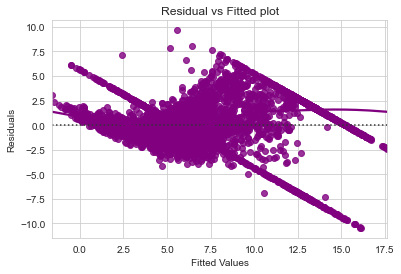

In [1381]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

* Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumption is satisfied.**

### TEST FOR NORMALITY

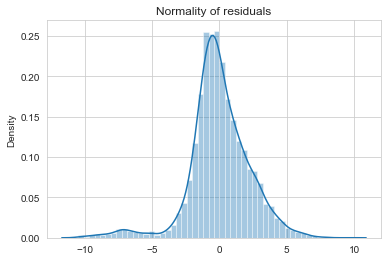

In [1382]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

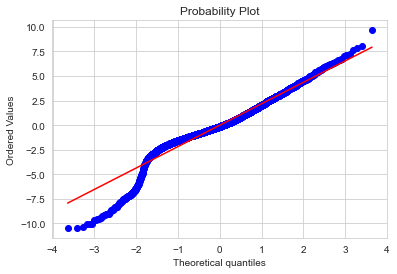

In [1383]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [1384]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9433026909828186, pvalue=2.2014398874542876e-40)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal.
* Hence we go with the QQ plot and say that residuals are normal.
* We can try to treat data for outliers and see if that helps in further normalizing the residual curve.

### TEST FOR HOMOSCEDASTICITY

For goldfeldquandt test, the null and alternate hypotheses are as follows:

- Null hypothesis : Residuals are homoscedastic
- Alternate hypothesis : Residuals have heteroscedasticity

In [1385]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train20)
lzip(name, test)

[('F statistic', 1.0586084500010278), ('p-value', 0.07692451034506423)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.**

### Predicting on the test data

In [1386]:
X_train20.columns

Index(['const', 'Year', 'Mileage', 'Power_z_std', 'Kilometers_Driven_z_std',
       'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Chevrolet',
       'Make_Datsun', 'Make_Fiat', 'Make_Ford', 'Make_Hindustan',
       'Make_Jaguar', 'Make_Jeep', 'Make_Land', 'Make_Mahindra',
       'Make_Mercedes-Benz', 'Make_Mini', 'Make_Porsche', 'Make_Tata',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0',
       'Seats_8.0', 'Seats_9.0'],
      dtype='object')

In [1387]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train20.columns]

In [1388]:
X_test_final.head()

,const,Year,Mileage,Power_z_std,Kilometers_Driven_z_std,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Ford,Make_Hindustan,Make_Jaguar,Make_Jeep,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Porsche,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Transmission_Manual,Fuel_Type_Diesel,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0
2954,1.000,2016.000,20.400,-0.508,-0.340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6520,1.000,2016.000,23.200,-0.649,0.548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
6036,1.000,2009.000,13.800,-0.756,0.862,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
6251,1.000,2014.000,15.600,-0.720,-0.296,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6735,1.000,2017.000,24.300,-0.387,-0.281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0


In [1389]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres19, X_train20.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,1.600,29.742,2.245,0.712


In [1390]:
# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres19, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,1.582,29.728,2.211,0.733


* Now we can see that the model has low test and train RMSE and MAE, and both the errors are comparable. So, our model is not suffering from overfitting.

* The model is able to explain 73.3% of the variation on the test set, which is good.

* The MAPE on the test set suggests we can predict within 29.7% of the price. 


**Hence, we can conclude the model *olsres19* is good for prediction as well as inference purposes.**

### Conclusion

***olsres19* is our final model which follows all the assumptions, and can be used for interpretations.**

1. Power and engine specs are highly correlated. The higher the spec for both, the higher the used car price.


2. Since engine specs and power are correlated to eachother strongly, price is correlated with each independently

3. Price and kilometers driven also have a strong correlation. The lower the kilometers driven, the higher the price for the used car is on average.


4. Newer model years of used cars on average have higher listing prices


5. Finally the make of the car also has correlation to price. Certain models of used cars on average will sell for a higher price dependent on variables that influence price listed above.